<a href="https://colab.research.google.com/github/so-yeon-hwang/DataSciencePractice/blob/main/Data_Science_Mid_term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

# 문제 3

In [ ]:
x_train = torch.FloatTensor([[1],[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3],[3]])

W = torch.FloatTensor([[1]])
b = torch.FloatTensor([[1]])

lr = 0.1

W,b

(tensor([[1.]]), tensor([[1.]]))

In [ ]:
W.requires_grad_(True)
b.requires_grad_(True)

h = torch.mm(x_train, W) + b
cost = ((y_train - h) ** 2).mean()

cost.backward() # Gradient calcualating function
with torch.no_grad() as grd : # pause _ gradient calculating
  W = W - lr * W.grad # updating W value : moving - direction
  b = b - lr * b.grad

print(cost.item(), W.squeeze(), b)


0.5 tensor(0.9800) tensor([[0.9900]])


In [ ]:
import torch

# 입력 데이터와 정답 데이터
x_train = torch.FloatTensor([[1], [1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3], [3]])

# 초기 가중치 및 편향
W = torch.FloatTensor([[1]])
b = torch.FloatTensor([[1]])

# 학습률
lr = 0.01

# 예측값 계산
prediction = x_train * W + b

# 오차 계산
cost = ((y_train - h) ** 2).mean()

# W와 b의 gradient 계산
W_gradient = torch.mean(cost * x_train)
b_gradient = torch.mean(cost)

# Gradient Descent를 사용하여 W와 b 업데이트
W = W - lr * W_gradient
b = b - lr * b_gradient

print("Updated W:", W)
print("Updated b:", b)


Updated W: tensor([[0.9912]], grad_fn=<SubBackward0>)
Updated b: tensor([[0.9950]], grad_fn=<SubBackward0>)


In [ ]:
W_gradient = torch.mean(cost * x_train)
W_gradient

tensor(0.8750, grad_fn=<MeanBackward0>)

# 문제 4

In [ ]:
import torch
import matplotlib.pyplot as plt

x_train = torch.FloatTensor([[1], [1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3], [3]])

w = torch.FloatTensor([[1]])
b = torch.FloatTensor([[1]])

for epoch in range(101):

  w.requires_grad_(True)
  b.requires_grad_(True)

  h = torch.mm(x_train, w) + b
  cost = ((y_train - h) ** 2).mean()

In [ ]:
w = torch.FloatTensor([[1]])
w.requires_grad_(True)
print(w.grad)

None


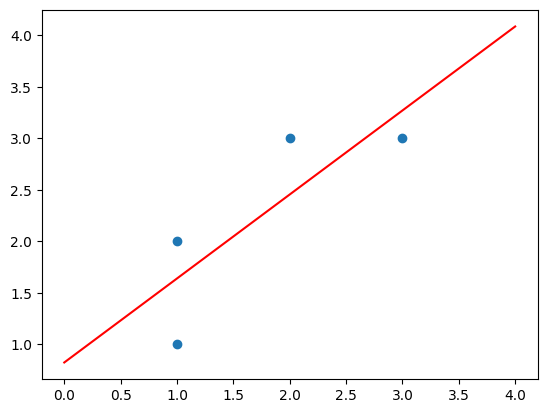

In [ ]:
plt.scatter(x_train,y_train)

X = torch.FloatTensor([[0],[4]])
Y = torch.mm(X,w) + b

plt.plot(X,Y,c='red')
plt.show()

In [ ]:
import torch
import matplotlib.pyplot as plt

x_train = torch.FloatTensor([[1], [1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3], [3]])

w = torch.FloatTensor([[1]])
b = torch.FloatTensor([[1]])

In [ ]:
w,b

(tensor([[1.]]), tensor([[1.]]))

In [ ]:
for epoch in range(101):

  w.requires_grad_(True)
  b.requires_grad_(True)

  h = torch.mm(x_train, w) + b
  cost = ((y_train - h) ** 2).mean()

  cost.backward()

  with torch.no_grad():
    w = w - 0.1*w.grad
    b = b - 0.1*b.grad
  print(epoch, cost.item(), W.squeeze(), b)

In [ ]:
x_train = torch.FloatTensor([[1], [1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3], [3]])

w = torch.FloatTensor([[1]])
b = torch.FloatTensor([[1]])
lr = 0.1

w.requires_grad_(True)
b.requires_grad_(True) # calculating Gradient 기울기를 계산한다  // requires grad True 로 설정

# making hypothesis
h = torch.mm(x_train, w) + b

# gap btw true values vs hypothesis values
cost = ((y_train - h) ** 2).mean()

cost.backward() # Gradient calcualating function
with torch.no_grad() as grd : # pause _ gradient calculating
    w = w - lr * w.grad # updating W value : moving - direction
    b = b - lr * b.grad

print(cost.item(), W.squeeze(), b)

0.5 tensor(0.9800) tensor([[0.9000]])


In [ ]:
x_train = torch.FloatTensor([[1], [1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3], [3]])

w = torch.FloatTensor([[1]])
b = torch.FloatTensor([[1]])

w.requires_grad_(True)
b.requires_grad_(True)

h = torch.mm(x_train, w) + b
cost = ((y_train - h) ** 2).mean()

cost.backward()

with torch.no_grad():
  w = w - 0.1*w.grad
  b = b - 0.1*b.grad

print(cost.item(), W.squeeze(), b)

0.5 tensor(0.9800) tensor([[0.9000]])


# 2페이지

In [ ]:
import pickle
data = pickle.load(open('docs.pkl','rb'))

# data['train'] 900개의 문서정보, 리스트 형태
# data['test] 10개의 시험용 문서정보, 임베딩벡터

# data[train][i] : i번 문서의 정보로, 128차원 벡터

In [ ]:
from collections import Counter

# 12번 문서에서 가장 많이 등장한 단어 5개를 찾기
doc_12 = data['train'][12]  # 12번 문서 (인덱스 11)

In [ ]:
count = doc_12['words']
count

In [ ]:
# 단어 등장 횟수를 기준으로 내림차순으로 정렬
sorted_count = sorted(count.items(), key=lambda x: x[1], reverse=True)

# 상위 5개 단어 추출
top_words = sorted_count[:5]

# 단어들을 띄어쓰기로 구분하여 출력
top_words_str = ' '.join(word for word, count in top_words)

print(top_words_str)


the in to a conte


In [ ]:
data['train'][31]

In [ ]:
# 문서를 단어의 집합으로 생각할 때

In [ ]:
def jaccard_similarity(d1,d2):
  if len(d1) == 0 or len(d2) == 0:
    return 0
  return len(d1&d2)/len(d1|d2)

In [ ]:
jaccard_similarity()

0.37142857142857144

tf idf 는 서로 곱한 값

In [ ]:
count = data['train'][1]['words'] # 딕셔너리


# 단어 목록
words = list(count.keys())

# 각 단어의 등장 횟수를 값으로 갖는 벡터 생성
word_vector = [count[word] for word in words]

# 결과 출력
print(word_vector)


[3, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 6, 2, 1, 1, 3, 1, 1, 3, 1, 1, 5, 2, 1, 1, 1, 4, 1, 2, 1, 11, 1, 2, 1, 1, 1, 1, 2, 4, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
# genre : from json string to python set
# make a new function

def str_to_set(x):
  word_set = set() # make an empty set
  for item in eval(x): # eval function > python object
    word_set.add(data['train']['words'])
  return word_set


In [ ]:
data['train'] = data.train.words.apply(str_to_set)

AttributeError: ignored

In [ ]:
data['train'][31]

{'text': 'Digital guru floats sub-$100 PC\n\nNicholas Negroponte, chairman and founder of MIT\'s Media Labs, says he is developing a laptop PC that will go on sale for less than $100 (£53).\n\nHe told the BBC World Service programme Go Digital he hoped it would become an education tool in developing countries. He said one laptop per child could be " very important to the development of not just that child but now the whole family, village and neighbourhood". He said the child could use the laptop like a text book. He described the device as a stripped down laptop, which would run a Linux-based operating system, "We have to get the display down to below $20, to do this we need to rear project the image rather than using an ordinary flat panel.\n\n"The second trick is to get rid of the fat , if you can skinny it down you can gain speed and the ability to use smaller processors and slower memory." The device will probably be exported as a kit of parts to be assembled locally to keep costs

In [ ]:
import numpy as np

# Jaccard 유사도 계산 함수 정의
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# 31번 문서의 단어 집합 가져오기
doc_31_words = set(data['train'][31]['words'].keys())

# 모든 다른 문서와의 유사도 계산
similarities = []

for i, doc in enumerate(data['train']):
    if i == 31:
        continue  # 자기 자신과의 유사도는 계산할 필요가 없습니다.

    other_doc_words = set(doc['words'].keys())
    similarity = jaccard_similarity(doc_31_words, other_doc_words)
    similarities.append((i, similarity))

# 유사도를 기준으로 내림차순으로 정렬
similarities.sort(key=lambda x: x[1], reverse=True)

# 상위 5개 유사한 문서 출력
top_similar_docs = similarities[:5]

for doc_idx, similarity in top_similar_docs:
    print(f"문서 {doc_idx}: 유사도 {similarity:.4f}")


문서 182: 유사도 0.9960
문서 323: 유사도 0.2014
문서 659: 유사도 0.1781
문서 749: 유사도 0.1756
문서 742: 유사도 0.1753


In [ ]:
182 323 659 749 742

In [ ]:
technologie technologie technologie technologie politics

In [ ]:
data['train'][182]['category']

'technologie'

In [ ]:
data['train'][323]['category']

'technologie'

In [ ]:
data['train'][659]['category']

'technologie'

In [ ]:
data['train'][749]['category']

'technologie'

In [ ]:
data['train'][742]['category']

'politics'

In [ ]:
# 모든 단어의 문서 집합 생성
word_to_docs = {}
for i, doc in enumerate(data['train']):
    words = set(doc['words'].keys())
    for word in words:
        if word in word_to_docs:
            word_to_docs[word].add(i)
        else:
            word_to_docs[word] = {i}

# "game"과 다른 단어 간의 Jaccard 유사도 계산
word_similarities = []

word1 = "game"
for word2 in word_to_docs.keys():
    if word2 != word1:
        docs_word1 = word_to_docs[word1]
        docs_word2 = word_to_docs[word2]
        jaccard_similarity = len(docs_word1.intersection(docs_word2)) / len(docs_word1.union(docs_word2))
        word_similarities.append((word2, jaccard_similarity))

# 유사도를 기준으로 내림차순으로 정렬
word_similarities.sort(key=lambda x: x[1], reverse=True)

# 상위 5개 유사한 단어 출력
top_similar_words = word_similarities[:5]

result = " ".join([word for word, similarity in top_similar_words])
print(result)


gaming nintendo sony video sonys


In [ ]:
import math

# 31번 문서 선택
doc = data['train'][31]

# TF 계산
tf_scores = {}
total_words = sum(doc['words'].values())
for word in doc['words']:
    tf_scores[word] = doc['words'][word] / total_words

# IDF 계산
idf_scores = {}
total_docs = len(data['train'])
for word in doc['words']:
    word_count = sum(1 for doc in data['train'] if word in doc['words'])
    idf_scores[word] = math.log(total_docs / word_count)

# TF-IDF 계산
tfidf_scores = {}
for word in doc['words']:
    tfidf_scores[word] = tf_scores[word] * idf_scores[word]

# TF-IDF가 높은 순으로 정렬
top_tfidf_words = sorted(tfidf_scores, key=tfidf_scores.get, reverse=True)[:5]

result = " ".join(top_tfidf_words)
print(result)


laptops negroponte laptop child digital


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 31번 문서의 임베딩 벡터
embedding_31 = np.array(data['train'][31]['embedding']).reshape(1, -1)

# 모든 문서의 임베딩 벡터 추출
all_embeddings = [np.array(doc['embedding']) for doc in data['train']]

# Cosine Similarity 계산
similarities = cosine_similarity(embedding_31, all_embeddings)

# 유사도가 높은 순으로 정렬
similarities = similarities[0]  # 2D 배열을 1D로 변환
sorted_indices = np.argsort(similarities)[::-1]  # 내림차순 정렬

# 가장 유사한 문서 5개 추출
top_indices = sorted_indices[1:6]  # 자기 자신(31번 문서)은 제외

# 문서 번호와 분류 추출
similar_docs = [f"{index} {data['train'][index]['category']}" for index in top_indices]

# 결과 출력
result = " ".join(similar_docs)
print(result)


182 technologie 749 technologie 72 technologie 66 technologie 302 technologie


In [ ]:
182 technologie 749 technologie 72 technologie 66 technologie 302 technologie

182 749 72 66 302
technologie technologie technologie technologie technologie

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 31번 문서의 임베딩 벡터
embedding_31 = np.array(data['train'][31]['embedding']).reshape(1, -1)

# 모든 문서의 임베딩 벡터 추출
all_embeddings = [np.array(doc['embedding']) for doc in data['train']]

# Cosine Similarity 계산
cosine_similarities = cosine_similarity(embedding_31, all_embeddings)[0]

# Jaccard Similarity 계산 함수
def jaccard_similarity(doc1, doc2):
    set1 = set(doc1)
    set2 = set(doc2)
    intersection = len(set1.intersection(set2))
    union = len(set1) + len(set2) - intersection
    return intersection / union

# 31번 문서의 단어 집합
words_31 = set(data['train'][31]['words'].keys())

# 모든 문서의 Jaccard Similarity 계산
jaccard_similarities = []
for doc in data['train']:
    words_doc = set(doc['words'].keys())
    jaccard_sim = jaccard_similarity(words_31, words_doc)
    jaccard_similarities.append(jaccard_sim)

# 상관관계 계산
correlation = np.corrcoef(jaccard_similarities, cosine_similarities)[0, 1]

# 결과 출력
print(correlation)


0.5404000524320155


In [ ]:
import numpy as np
import tensorflow as tf

# 학습 데이터 및 테스트 데이터 로드
X_train = np.array([doc['embedding'] for doc in data['train']])
y_train = [doc['category'] for doc in data['train']]
X_test = np.array([doc['embedding'] for doc in data['test']])

# 분류 레이블을 원-핫 인코딩
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_encoded = lb.fit_transform(y_train)

# Softmax Regression 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(len(set(y_train)), activation='softmax', input_shape=(128,))
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 예측 결과 해석
predicted_categories = [list(set(y_train))[np.argmax(pred)] for pred in y_pred]

# 결과 출력
predicted_categories_str = ' '.join(predicted_categories)
print(predicted_categories_str)


Epoch 1/10
29/29 [==============================] - 1s 3ms/step - loss: 2.2985 - accuracy: 0.1044
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 2.2932 - accuracy: 0.2222
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 2.2883 - accuracy: 0.3311
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 2.2834 - accuracy: 0.4122
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 2.2785 - accuracy: 0.4811
Epoch 6/10
29/29 [==============================] - 0s 4ms/step - loss: 2.2736 - accuracy: 0.4889
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 2.2687 - accuracy: 0.5100
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 2.2640 - accuracy: 0.5189
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 2.2592 - accuracy: 0.5589
Epoch 10/10
1/1 [==============================] - 0s 119ms/step
food medical business politics politics entertainment